# Data Analysis and Reporting with Structured Querying Language (SQL)

**🎯 Lesson Objectives**

**By the end of this lesson, you will be able to:**

- Understand what SQL is and how it differs from Pandas for data analysis.
- Know when to use SQL vs Pandas depending on the task and dataset size.
- Set up a database connection and retrieve data using SQL or Pandas.
- Use common SQL statements: `SELECT`, `LIMIT`, `WHERE`, `ORDER BY`.
- Apply advanced filtering with SQL predicates like `IN`, `LIKE`, `AND`, `OR`, `NOT`, and handle `NULL` values.
- Write clean and maintainable SQL using best practices and understand typical SQL query structure.
- Perform column-level operations with SQL functions like `DISTINCT`, `TRIM`, `SUBSTR`, `LENGTH`, `CONCAT`, and `CAST`.
- Use aggregate functions such as `SUM`, `AVG`, `MAX`, `MIN`, `COUNT` to summarize data.
- Group and filter aggregated data using `GROUP BY` and `HAVING`.
- Implement conditional logic in queries using `CASE` statements.


**🎯What we will cover:**

**Part 1 - Exploratory Data Analysis (EDA)**
- SQL: Structured Querying Language
- SQL vs. Pandas
- When to use SQL or Pandas?
- Setting up the database connection
- Retrieve data: SQL vs Pandas
- SQL Statements: SELECT, LIMIT, WHERE, ORDER BY
- Advanced Filtering with WHERE
- Exploring Predicates: IN, LIKE, AND, OR, NOT, NULL
- Best practices for writing SQL queries
- General SQL query structure

**Part 2 - Column operations**
- Explore DISTINCT, TRIM, SUBSTR, LENGTH, CONCAT, CAST
- AGGREGATE FUNCTIONS
- GROUP BY
- HAVING
- CASE STATEMENT



# 🚀Part 1 - Exploratory Data Analysis (EDA)

## ☑️ SQL: Structured Querying Language

- SQL stands for Structured Querying Language.
- It is a language dedicated to making it easy to insert, update, and read from your database. 
- There are many dialects of SQL, some are open source and others are maintained by companies who have SQL-based services to offer. SQLite, MySQL, PostgreSQL

## ☑️ SQL vs. Pandas


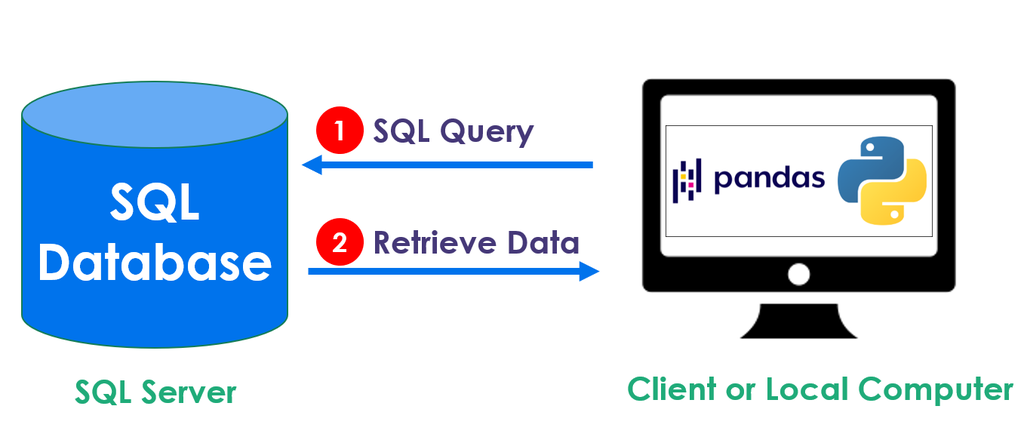

- SQL is executed on server
- Pandas is executed on client

You have already seen the python package Pandas, and you might be wondering why we aren't using it for our database instead of SQL.

The main difference is that SQL is executed on a server whereas Pandas executes locally.

This means that SQL lends itself well to scaling up to enormous datasets, accessible from several machines, whereas Pandas is more suited to smaller datasets that can be accessed locally.

## ☑️ When to use SQL or Pandas?

Choose **maintainability** and **readability** to guide your decision.

- SQL is a suitable tool for **simple** data analysis
- Pandas is suitable for **complex** data analysis
- Use SQL to transform data into manageable size before loading it into pandas dataframe
- It is easier to debug pandas code

So now we're going to go through an example and compare how we might do some simple data exploration in the two frameworks.

## ☑️ Setting up the database connection

In [ ]:
import sqlite3
conn = sqlite3.connect('data/shop_db.db')

Remember we said that SQL executes on a server whereas Pandas executes locally. This means that in order to run the database, we need to use a library (in this case, sqlite3) to set up a server, and then we need to connect to the server in order to actually run the queries. 

## ☑️ Shop database table structure (schema)
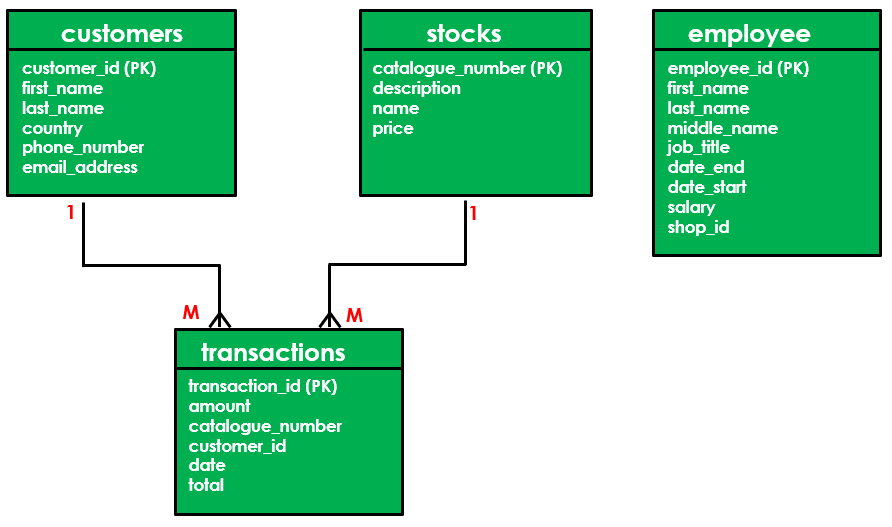

The customers table tracks all customer information, the stocks table tracks all product information, the transaction table tracks all transactions that had taken place and the employee table tracks information related to company employees. 

As illustrated above customer-transactions and stocks-transactions tables are having one-to-many relationships. Also please note the employee table is not connected to any other table.

## ☑️  Retrieve data: SQL vs Pandas

### SQL 

```SQL
SELECT first_name, last_name FROM customers;
```

### Pandas

```Python
customers[['first_name','last_name']]
```

- Pandas also supports SQL queries, which we'll use here for ease of integration with Python (and displaying tables)

So the most important operation in SQL is the SELECT operation. This is roughly equivalent to indexing in a pandas dataframe. The query `SELECT first_name, last_name FROM customers;` looks up the columns first_name and last_name in the table "customers". 

The equivalent query in Pandas would be to index the columns with the list of columns that we want (first and last name).

#### 💡 Knowledge Check 1

What is the purpose of using `sqlite3.connect('data/shop_db.db')` in Python?

- A) It **creates** a new SQL table for storing customer data  
- B) It **establishes a connection** to the SQL database so that queries can be executed  
- C) It **converts a Pandas DataFrame** into an SQL table  
- D) It **retrieves all the tables** in the database automatically  

In [ ]:
# add your answer here: 

# SQL Statements

## ☑️ SELECT

In [ ]:
import pandas as pd

query = """
SELECT * 
FROM customers;
"""
df = pd.read_sql_query(query, conn)
df

Here's an example of how pandas `.read_sql_query()` method can be used to execute an SQL query. 

The asterisk `(*)` symbol in a SQL SELECT statement is a shorthand notation that represents all columns in a table. When used in a SELECT statement, the asterisk is used to retrieve all columns from a table.

The FROM keyword is used to specify the table or tables from which you want to retrieve data. Here, customers is the name of the table from which you want to retrieve data.

In return, we get a table of information related to shop customers. We can see that the columns have different types - e.g. the customer_id is a number whereas the names are strings.  In general, this is reasonably representative of the table structure that is fundamental to SQL.

In SQL, the semi-colon (;) at the end of a query is used to indicate the end of the statement. While some database management systems may not strictly require the use of a semi-colon (;) to end a query, it is considered a best practice to always include one.

In [ ]:
#Example_2

query = """
SELECT first_name, last_name 
FROM customers;
"""

df = pd.read_sql_query(query, conn)
df

And here if we execute the same SQL query, but this time only fetching the columns first_name and last_name. We do this by explicitly defining column names rather than relying on the asterisk.

## ☑️ LIMIT

Limits the number of records retrieved.

### SQL 

```SQL
SELECT * FROM customers LIMIT number_of_rows_returned;
```

### Pandas

```Python
customers.head()
```

In [ ]:
%%time

query = """
SELECT * 
FROM customers
LIMIT 3;
"""

df = pd.read_sql_query(query, conn)
df

Use `%%time` at the beginning of a cell, to measure the query execution time. By incorporating this command, you can precisely evaluate the efficiency of your SQL queries, enabling you to optimise them for better performance.

When you execute a SQL query within a Jupyter Notebook cell, the %%time magic command provides valuable insights into how long the query takes to run. This timing information is crucial, especially when dealing with large datasets or complex queries. It helps you identify bottlenecks, inefficiencies, or resource-intensive operations within your SQL code.

It's rare that when we select columns we want *all* of the rows. The simplest way to filter out rows is to use LIMIT, which just limits the number of rows returned to the number you specify. In this example, we set the LIMIT to be 3 and get 3 rows in return. 

In the real world, we often will want to do something more complex than LIMIT to filter out the rows, but this is a good starting point, especially when you need to remember what your dataset looks like!

## ☑️ WHERE

### SQL 

```SQL
SELECT * FROM customers WHERE first_name = 'Rupert';
```

### Pandas

```Python
customers[customers['first_name'] == 'Rupert']
```

In [ ]:
%%time

query = """
SELECT * 
FROM customers 
WHERE first_name = 'Rupert';
"""

df = pd.read_sql_query(query, conn)
df

Use `%%time` at the beginning of a cell, to measure the query execution time.

Here's an example of a more interesting way to filter rows - using a "WHERE" keyword. This says "SELECT" all the columns from the table customers "WHERE" their first name is Rupert.

If there were multiple Ruperts in our table then we would get all of them back in return. 

## ☑️ ORDER BY
- Sorts the results in ascending (ASC) or descending (DESC) order
- If no order is specified ASC is applied by default

In [ ]:
%%time

query = """
SELECT *
FROM transactions
ORDER BY amount DESC;
"""

df = pd.read_sql_query(query, conn)
df

Use `%%time` at the beginning of a cell, to measure the query execution time.

For example, here we sort the rows in descending order by the "amount" of an item that was in a specific transaction.

#### 💡 Knowledge Check 2

Which of the following SQL queries correctly selects all columns from the `customers` table where the `first_name` is `'Rupert'`? 

A)  
```sql
SELECT * 
FROM customers 
WHERE first_name == 'Rupert';
```

B)  
```sql
SELECT * 
FROM customers 
WHERE first_name = 'Rupert';
```

C)  
```sql
SELECT ALL 
FROM customers 
WHERE first_name IS 'Rupert';



D)  
```sql
SELECT ALL 
FROM customers 
WHERE first_name EQUALS 'Rupert';
```

In [ ]:
# add your answer here: 

# Advanced Filtering with WHERE

## ☑️ Predicates

- A predicate is a condition that is used in the WHERE keyword to further filter the rows returned by a SELECT statement 

- A predicate can be a simple comparison between two values or a complex combination of conditions using logical operators such as AND and OR


Let’s explore more sophisticated ways for filtering out rows with predicates:

## ☑️ IN

The IN predicate is used to match a value against a list of specified values. It is used in the WHERE keyword of a SQL query to filter the result set based on a set of values.


### SQL

```SQL
SELECT * FROM table WHERE column IN list_of_options;
```
### Pandas

```Python
customers[customers['country'].isin(['UK','FR'])]
```

In [ ]:
query = """
SELECT * 
FROM customers 
WHERE country IN ('UK','FR');
"""

df = pd.read_sql_query(query, conn)
df

In the above example "IN" predicate is used to filter customers "WHERE" their country identifier is in the list ('UK','FR'). 

In Pandas we can use either type of quotation make (double or single) but you'll need to watch out for this when we switch to a conventional SQL client! conventional SQL clients use to prefer single quotes.

## ☑️ LIKE

The LIKE predicate is used to match a value against a pattern using wildcards. It is used with the WHERE keyword of a SQL query to filter the result set based on a pattern match.

The LIKE predicate compares the values of a column to the specified pattern, which can include wildcard characters `%` (percentage symbol) and `_ `(underscore symbol). 

- The `%` symbol is used to match any string of zero or more characters
- The `_` symbol is used to match any single character


For more info regarding wildcard characters [click here](https://www.w3schools.com/sql/sql_wildcards.asp)


Syntax:
### SQL

```SQL
SELECT * FROM customers WHERE email_address LIKE pattern;
```

### Pandas

```Python
customers[customers['email_address'].str.contains(pattern)]
```

In [ ]:
#Example_1

query = """
SELECT *
FROM customers
WHERE email_address LIKE '%.co.uk';
"""

df = pd.read_sql_query(query, conn)
df

This will match any string that ends with `.co.uk` (uppercase or lowercase). You can use the % symbol at the beginning of the pattern.

In [ ]:
#Example_2

query = """
SELECT *
FROM customers
WHERE first_name LIKE 'E%';
"""

df = pd.read_sql_query(query, conn)
df

Here's another example that filters out rows based on a pattern, this time matching on any first names which start with "E" (uppercase or lowercase) and then have anything afterwards.

Please note you can use the % symbol at the beginning and end of the pattern or at both locations at the same time, for example, pattern %E% - matches any string that contains the letter "E" (uppercase or lowercase) anywhere within it.

In [ ]:
#Example_3

query = """
SELECT *
FROM customers
WHERE first_name LIKE '_l%';
"""

df = pd.read_sql_query(query, conn)
df

Here's another example that retrieve all names containing the letter "l" (uppercase or lowercase) in the second position and then have anything afterwards. 

#### 💡 Knowledge Check 3

Which of the following SQL queries correctly selects all customers where the `country` is either `'UK'` or `'FR'`? 

A)  
```sql
SELECT * 
FROM customers 
WHERE country = ('UK','FR');
```

B)  
```sql
SELECT * 
FROM customers 
WHERE country IN ('UK','FR');
```

C)  
```sql
SELECT * 
FROM customers 
WHERE country IS ('UK','FR');
```

D)  
```sql
SELECT * 
FROM customers 
WHERE country LIKE ('UK','FR');
```

In [ ]:
# add your answer here: 

## ☑️ AND, OR, NOT

The AND, OR, and NOT operators or predicates are used to combine multiple conditions in a SQL query. These operators allow you to create more complex queries that involve multiple conditions. 

- AND: evaluates to TRUE if all conditions are TRUE
- OR: evaluates to TRUE if any of the conditions are TRUE
- NOT: evaluates to TRUE if the condition is FALSE (NOT TRUE)

In [ ]:
#Example_1

query = """
SELECT *
FROM customers
WHERE country IN ('UK','FR') AND first_name LIKE 'A%';
"""

df = pd.read_sql_query(query, conn)
df

In the above example we SELECT every column from the customer table conditioned on BOTH the country being in the list ('UK','FR') and the first name matching the pattern 'A%'. Both of these conditions have to be true in order for the row to be returned because we used AND operator. 

In [ ]:
#Example_2

query = """
SELECT *
FROM customers
WHERE country IN ('UK','FR') OR first_name LIKE 'A%';
"""

df = pd.read_sql_query(query, conn)
df

If we use OR operator instead, we pick up lots more rows because each row is selected if EITHER of the conditions is true. So for example we can see that the first row (customer_id 1) is selected because their country is "UK", despite first_name not starting with letter "A". 

In [ ]:
#Example_3

query = """
SELECT *
FROM customers
WHERE country NOT IN ('UK','FR');
"""

df = pd.read_sql_query(query, conn)
df

Here's an example that demonstrates how to use NOT operator with IN and WHERE to exclude rows where the country column matches either "UK" or "FR".

## ☑️ NULL in SQL


In SQL, NULL represents the absence of a value in a column. A NULL value in a column indicates that the value for that column is unknown, undefined, or not applicable. Analogous to `NaN`, `NA`, `None` in Python.

- **IS NULL** and **IS NOT NULL** predicates
- **IFNULL()** function

### Filtering null values

```SQL
SELECT column from table WHERE column IS NOT NULL;
```
For example, if we want to send out an email to our customers then we can fetch all the rows where we have an email address stored. 

In [ ]:
query = """
SELECT email_address
FROM customers
WHERE email_address IS NOT NULL;
"""

df = pd.read_sql_query(query, conn)
df

### Replacing null values with a default value

```SQL
SELECT IFNULL(column, default_value) from table;
```
Another common strategy is to swap out "null" values for a default value. For example, here we replace any NULL values with the string "Unknown" - note that this isn't updating the database itself, it's just replacing the NULL values in the SQL query to the string "Unknown". 

In [ ]:
query = """
SELECT email_address, IFNULL(email_address, "Unknown")
FROM customers
"""

df = pd.read_sql_query(query, conn)
df

#### 💡 Knowledge Check 4

Which SQL query correctly selects all customers where the `country` is either `'UK'` or `'FR'` AND their `first_name` starts with `'A'`?

A)  
```sql
SELECT * 
FROM customers 
WHERE country = ('UK','FR') AND first_name LIKE 'A%';
```

B)  
```sql
SELECT * 
FROM customers 
WHERE country IN ('UK','FR') OR first_name LIKE 'A%';
```

C)  
```sql
SELECT * 
FROM customers 
WHERE country IN ('UK','FR') AND first_name LIKE 'A%';
```

D)  
```sql
SELECT * 
FROM customers 
WHERE country NOT ('UK','FR') AND first_name LIKE 'A%';
```

In [ ]:
# add your answer here:

## ☑️ Best practices for writing SQL queries

This section focuses on how to format and style SQL queries correctly to improve readability, consistency and maintainability.

### Case sensitivity

- SQL commands are case insensitive: `SELECT`, `select`, `Select`
- SQL values are case sensitive: `Rupert` vs. `rupert`


### Style guidelines
- Use uppercase for SQL keywords
- Use “AS” keyword to alias or rename a column or table with descriptive names
- Use consistent indentation to improve the readability of SQL code
- Use line breaks and white space to separate SQL keywords and improve readability
- Use two dashes (--) to add comments, and notes to explain the SQL code
- Adding commas before the column helps debugging (by commenting out code)
- Avoid using reserved words as identifiers: Avoid using SQL reserved words as table or column names to prevent errors and confusion.
- Use semicolons (;) to terminate statements 

Example:
    
```SQL
SELECT 
      first_name
    , last_name
    , --country
    , ifnull(column, default_value) AS email_address
FROM customers
WHERE email_address LIKE "%.co.uk"
ORDER BY first_name ASC
LIMIT 3;
```
For more info regarding style guidelines and formatting: [click here](http://poorsql.com)

## ☑️ General SQL query structure

```SQL
SELECT <column_list>
FROM <table_name>
WHERE <filter_condition>
ORDER BY <column_list> [ASC|DESC]
LIMIT <number_of_rows>;
```
Now that we've seen a few queries we can start to think about the general structure of SQL queries. This sort of template might be a useful reference point for the exercises, but will start to feel natural soon enough! 

We always specify the columns we want first with SELECT. Next, we specify the table we are collecting data from, followed by the row-wise options: WHERE, ORDER BY and LIMIT. 

#  🚀 Part 2 - Column operations

So far we've mainly talked about extracting row-based information from tables. Now we're going to discuss column-based operations. 

This is mostly going to be a list of functions: don't worry you're not supposed to memorise them all! Feel free to come back to this as much as you need to, the key thing is that you have an idea that these sorts of things exist.

In [ ]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('data/shop_db.db')

In [ ]:
query = """
SELECT *
FROM customers;
"""

df = pd.read_sql_query(query, conn)
df

## ☑️ DISTINCT

Returns only distinct values and eliminates duplicates 
```SQL
SELECT DISTINCT(column) FROM table;
```


In [ ]:
query = """
SELECT DISTINCT(country)
FROM customers;
"""

df = pd.read_sql_query(query, conn)
df

In our example if we just returned the country column it might be hard to read off a list of the countries our customers come from. Instead we can get the list of unique countries using the DISTINCT function in the SELECT part of the query. 

This is also sometimes helpful for debugging! When for example we have two slightly different spellings of the same item, it's easy to spot using the DISTINCT function. 

## ☑️ TRIM

Removes a specified prefix or suffix from a string (default: whitespace).

```SQL
SELECT TRIM(column) FROM table;
```

In [ ]:
#Example_1

query = """
SELECT TRIM(country)
FROM customers;
"""

df = pd.read_sql_query(query, conn)
df

Another column-wise operation is TRIM - this is particularly useful for string-processing when for example we want to eliminate the whitespace from strings.

Indeed, this is the default behaviour (i.e. if we don't specify what to trim, the TRIM function will default to removing any whitespace from each row in the specified column). The most common example of this is if we want to remove unwanted spaces from strings like email addresses, or phone numbers.

In [ ]:
#Example_2

query = """
SELECT first_name, TRIM(first_name, "A")
FROM customers;
"""

df = pd.read_sql_query(query, conn)
df

A less subtle example is, for example, removing the character "A" from all of the strings in the column "first_name".

This is obviously not the most practical example, but you can imagine that maybe we have some special characters in there that we want to get rid of.

## ☑️ SUBSTR

SUBSTR function is a slight extension of TRIM: it lets us actually index the strings to extract some subset of the characters. 

It takes three parameters: the column to operate on, the starting position X and the length of the substring Y (i.e. the number of characters to take starting from position X).

Given

```SQL
SELECT SUBSTR(column, X, Y) FROM table_name;
```

extracts a substring of length Y, starting at character X. 

Example:


```SQL
SELECT SUBSTR(first_name, 3, 1) FROM customers;
```

In [ ]:
query = """
SELECT first_name, SUBSTR(first_name, 3, 1) AS name_letter
FROM customers;
"""

df = pd.read_sql_query(query, conn)
df

In this example, we take the column "first_name" and get 1 character starting from position 3. So for example the name "Rupert" becomes "p", "Emma" becomes "m". 

#### 💡 Knowledge Check 5

Write an SQL query to remove leading and trailing whitespace from the `email_address` column in the `customers` table and return the cleaned email addresses.

- Use the **TRIM** function to clean the `email_address` column  
- Retrieve the cleaned email addresses along with the customer’s `first_name`  

In [ ]:
#Write your SQL query here

#query = ...
#df = pd.read_sql_query(query, conn)
#df

## ☑️ LENGTH

Returns the length of a string.

```SQL
SELECT LENGTH(column) FROM table;
```

In [ ]:
query = """
SELECT first_name, LENGTH(first_name) AS name_length
FROM customers;
"""

df = pd.read_sql_query(query, conn)
df

Here's an example of how to use the LENGTH function. Suppose we have a table called "customers" with a column called "first_name" that contains the names of customers. We want to find the length of each customer's first name.

## ☑️ CONCAT

The CONCAT function is used to concatenate (join) two or more strings together. 

Please note in some SQL clients, there is a CONCAT function however in SQLite this is an operator: bar bar (||).

```SQL
SELECT column1 || column2 FROM table;
```

In [ ]:
query = """
SELECT first_name || ' ' || last_name AS full_name
FROM customers;
"""

df = pd.read_sql_query(query, conn)
df

CONCAT is also an operation you might have come across in Python too. In the above example, we are concatenating the first and last name of each of our customers.

## ☑️ CAST

The CAST function is used to convert a value from one data type to another. It takes two arguments: the value to be converted and the target data type.

Syntax:
```SQL
SELECT CAST(column AS data_type) FROM table;
```

In [ ]:
query = """
SELECT phone_number, CAST(phone_number AS INT)
FROM customers;
"""

df = pd.read_sql_query(query, conn)
df

A common example for this is when we end up reading inputs from a file and we have numbers as strings: we might want to CAST them into a number format.
 
In this example we convert the column phone_number from STRINGs into integers - again not a particularly practical example but it's a good illustrator of how this works.

## ☑️ AGGREGATE FUNCTIONS

SQL aggregate functions are used to perform calculations on sets of values and return a single value as the result (summary statistics).

They are commonly used with the SELECT statement and GROUP BY clause to aggregate data in a meaningful way.

```SQL
SELECT COUNT(column) FROM table;
SELECT SUM(column) FROM table;
SELECT AVG(column) FROM table;
SELECT MIN(column) FROM table;
SELECT MAX(column) FROM table;
```

In [ ]:
query = """
SELECT SUM(total), MAX(total), MIN(total)
FROM transactions;
"""

df = pd.read_sql_query(query, conn)
df

In the above example, we're applying SUM(), MAX() and MIN() over the whole column "total".

These operations are particularly interesting when grouping data as we will see shortly.

#### 💡 Knowledge Check 6

What is the primary purpose of the CAST function in SQL?

- A) To remove NULL values from a column  
- B) To concatenate two string columns  
- C) To convert a value from one data type to another  
- D) To filter out duplicate rows 

In [ ]:
# add your answer here:

## ☑️ GROUP BY

SQL allows you to group data using the GROUP BY keyword. 

The GROUP BY keyword groups data based on one or more columns in a table and produces summary statistics for that group.

In [ ]:
query = """
SELECT customer_id, SUM(total) AS total_spent_per_customer
FROM transactions
GROUP BY customer_id
ORDER BY total_spent_per_customer DESC;
"""

df = pd.read_sql_query(query, conn)
df

In the transactions table, we might have multiple transactions per customer.

- In this example, we GROUP BY customer_id, so that the transactions are split into several groups: one per customer. 

- Then we apply SUM() function, to calculate the total spent per group (and therefore per customer).

- We also use an "ORDER BY" to sort the rows by their total spend. 

- We can see the result in the table: there is now one row per customer ID, with the id mapping to total spend.

*Note that any column in the SELECT statement that is not included in the GROUP BY must be aggregated using a function such as SUM, AVG, MAX, MIN, etc. This is because each row in the result set corresponds to a unique combination of the columns specified in the GROUP BY.*

## ☑️ HAVING

The HAVING keyword is used in SQL in combination with the GROUP BY to filter aggregated results.

In [ ]:
query = """
SELECT customer_id, SUM(total) AS total_spent_per_customer
FROM transactions
GROUP BY customer_id
HAVING total_spent_per_customer > 10
ORDER BY total_spent_per_customer DESC;
"""

df = pd.read_sql_query(query, conn)
df

**Important**: WHERE is used to filter rows, HAVING is used to filtering aggregated results

In the above example, we are calculating SUM per customer, but this time filter the results of sum of total spend, greater than 10. 

## ☑️ CASE STATEMENT

The CASE statement in SQL is used to check conditions and perform tasks on each row while selecting data (like an if-else statement). It can be used in a SELECT statement to create a calculated column.

```SQL
SELECT column1, column2, column3,
CASE
    WHEN condition1 THEN result1
    WHEN condition2 THEN result2
    ...
    ...
    WHEN conditionN THEN resultN
    ELSE result
END AS some_alias
FROM table;
```

The CASE statement goes through conditions and returns a result. 

- "CASE": This keyword marks the start of the CASE statement.

- "WHEN": This keyword is used to specify a condition. So, once a condition is true, "THEN" keyword will return a result. 

- "ELSE": This specifies the default result that should be returned if none of the "WHEN" conditions are true.

- "END": This keyword marks the end of the SQL CASE statement. This creates a new column with the alias "some_alias".

In [ ]:
query = """
SELECT first_name, phone_number, email_address,
CASE
    WHEN phone_number IS NULL AND email_address IS NULL THEN 'No contact details'
    WHEN phone_number IS NULL THEN email_address
    ELSE phone_number
END AS contact_details
FROM customers;
"""

df = pd.read_sql_query(query, conn)
df

Take a minute to read through this query.

We're creating a column called "contact_details": first we check if both the phone_number and email_address are NULL, then we return the string 'No contact details'.

If this isn't true then it means that either of phone number or email address is there. Next, we check if phone_number is NULL: if it is then email_address must have a value, so we return it.

Finally, if it's not true that phone_number is null, this must mean that it has a value, so we return it.

The result is the table you see, with our new column contact_details. Where users had neither email nor phone number, we have a string 'no contact details'. Where there is only an email address, we have that. Where there is just a phone number or both a phone number and an email address: we return the phone number. 

### **🔑 Summary / Key Takeaways**
By completing this lesson, you should now be able to:


- ✅ Understand what **SQL** is and how it differs from **Pandas** for data analysis.  
- ✅ Know when to use **SQL vs. Pandas** based on the task and dataset size.  
- ✅ Set up a **database connection** and retrieve data using SQL or Pandas.  
- ✅ Use common SQL statements: `SELECT`, `LIMIT`, `WHERE`, `ORDER BY`.  
- ✅ Apply advanced filtering with predicates like `IN`, `LIKE`, `AND`, `OR`, `NOT`, and handle `NULL` values.  
- ✅ Write clean, maintainable SQL and understand standard **SQL query structure**.  
- ✅ Perform column-level operations using functions like `DISTINCT`, `TRIM`, `SUBSTR`, `LENGTH`, `CONCAT`, and `CAST`.  
- ✅ Use aggregate functions: `SUM`, `AVG`, `MAX`, `MIN`, `COUNT`.  
- ✅ Group and filter data using `GROUP BY` and `HAVING`.  
- ✅ Implement conditional logic using **`CASE` statements**.  


### **📝 Next Steps:**  

- **Complete the practical lab work**: Open and work through the following workbook:`intro-to-sql-workbook.ipynb`. 